# Neural Networks: Sentiment analysis on IMDB reviews

## Structure
- Project Overview
- Reference notes: Deep learning with Python
    - Part 1: The anatomy of a neural network; a proposed workflow using Keras
    - Part 2: Data structures in deep learning 
    - Part 3: The gears of neural networks: tensor operations
    - Part 4: The engine of neural networks: gradient-based optimisation
- Building the neural network to classify reviews
    - Step 1: Load our data
    - Step 2: Further data prep-preprocessing
    - Step 3: Split the data for training and VALIDATION
    - Step 4: Initialise the neural network 
    - Step 5: Configure the neural network
    - Step 6: Train the model
    - Step 7: Plot our results

## Project Overview

**Sentiment analysis on an IMDB review dataset**

The objective of our project is to train a machine learning model to predict whether an IMDB textual review is positive or negative in sentiment. This type of textual analysis that detects emotion or intent is commonly referred to as **sentiment analysis**.

The dataset is of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

**Sentiment analysis in practice**

Training and operationalising such a model has numerous use cases in practice. For example:
- IMDB could build and operationalise a sentiment analysis model to help them understand their user segments and popular categories
- A competitor of IMDB could build such a model to help decide which IMDB user segments to target with conversion messaging`
- A production studio could build such a model to identify the drivers of popular and unpopular films, allowing them to optimise towards theartical success 


## Reference notes: Mathematical concept in deep learning (Python)

I recommend using the notes and this practical walkthrough in tandem as the notes goes deeper and provide resources for further learning.

The notes: https://dark-ocicat-52d.notion.site/WIP-Deep-learning-with-Python-513467c175d24ef38a5bcbdda74bec96

### Part 1: The anatomy of a neural network; a naive explanation

In this chapter we make some important definitions about the components of a neural network. The aim here is to understand at a high level how a neural network is constructed and learns. The following Part's examine how this happens in more mathematical and statistical detail.

**1.1: The anatomy of a nerual network**

**1.2: Layers**

**1.3: Input data and their labels/targets**

**1.4: The loss function**

**1.5: The optimiser**

### Part 2: Data structures in deep learning 

In this section we learn that machine learning models expect your data to be encoded as matrices (tensors) before anything fun can happen. We learn that this "data pre-processing" stage is typical and can be time consuming. We make some definitions and use this chapter to frame our thinking; that is, that neural networks involve encoding raw data into tensors and that neural networks are really just lots of tensor operations chained together + some fancy learning that occurs due gradient-based optimisation.

**2.1: Matrices are called tensors and tensors are the currency of deep learning**

**2.2: Data representaitons for neural networks**

### Part 3: The gears of neural networks: tensor operations 

In this section we consolidate that neural networks perform matrice operations over and over and that a layer node can be described as a "tensor in tensor out" operation. We see that this operation is fairly simple, consisting of 3 matrice transformations. This chapter focuses on demonstraing the core matrice operations that we need to be familiar with, and shows how we can replicate linear algebra operations step-by-step, using Python code.

**3.1: Element-wise operations**

**3.2: Broadcasting**

**3.3: Tensor dot operations**

**3.4: Tensor reshaping**

### Part 4: The engine of neural networks: gradient-based optimisation

In this section we tie everything together by learning that the derivative of a tensor operation is a gradient. We then learn that to get a neural network "learning" we use stochastic gradient descent. Here, stochastic gradient descent and Backpropagation will continually tweak our models weights and biases over an over, as it seeks to reduce the models loss (gradient) and therefore improve the models accuracy.

**4.1: Recap of where we have been**

**4.2: What's a derivative**

**4.3: Derivative of a tensor operation: the gradient**

**4.4: Stochastic gradient descent**

**4.5: Chaining derivatives: the Backpropogation algorithm**


## Commencing the project



### Step 1: Importing our dataset

Data pre-processing involves preparing data for a ML model. The dataset we going to import and use has already had some pre-processing performed on it and is standard and accessible dataset accessed in the Keras library. 

In [37]:
# Import the IMDB module 
from keras.datasets import imdb

# Split the training data and labels into seperate variables, where the train data is the review and the train label is the 
# result (1 positive or 0 negative). We do the sme for the testing data and specify the number of words we are focusing on.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

The variables **train_data** and **test_data** are lists of reviews (split so that there are 25k reviews stored in each variable); each review is a list of word indices (encoding a sequence of words). **train_labels** and **test_labels** are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [38]:
# Print the first review by accessing the first element in the train_data dataset
print(f'The first review looks like this, as the words have already been turned into integers for us:\n\n {train_data[0]}')
# Print with corresponding label for the review by accessing the first element in the train_labels dataset
print(f'\nAnd its label is {train_labels[0]}. meaning this was a positive review.')

The first review looks like this, as the words have already been turned into integers for us:

 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 

**Key ideas covered in Step 1**

In this step we imported our **mostly** prepared dataset and split it into training and testing datasets. We also printed the first review and its associated label to visualise how our review was encoded of a list of integers, where each integer represents a word in the dictionary, and where the label 1 means the review was positive in sentiment.

We were lucky here that somebody had already encoded each of the 50k reviews into a list of integers and labeled them positive or negative. Normally we have to prepare this ourselves.


### Step 2: Additional data pre-processing

Machine learning at its core involves learning "representations" of data. We can't just feed lists of integers into our neural network, we need to convert these lists into something that our model can learn from. That is, we must turn our lists of integers into tensors of 1s and 0s.

In the cell below I write a function to vectorise our review data (lists of integers) into a machine learning condusive tensors. Here, we select *One-hot encoding* to convert our lists of words into vectors of 1s and 0s. There are other methods available.

In [39]:
import numpy as np

def vectorise_sequences(sequences, dimensions=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        # Sets specific indicies of result[i] to 1s
        results[i, sequences] = 1
    return results

# Use function to vectorise the training data 
x_train = vectorise_sequences(train_data)
# Use function to vectorise the test data
x_test = vectorise_sequences(test_data)

**Example of using our function to vectorise a 3 word review into a 10000 dimensional array**

Below, each row will be all 0s excepct for the words at place's 0, 1 and 9999. These will be 1s. *Note*: Python's first element is at index 0. 

In [32]:
l = [0, 1, 9999]
print(f'Before vectoring our list of integers: {l}\n')
j = vectorise_sequences(l)
print(f'Our 10000 dimensional array after vectorising the review:\n{j}')

Before vectoring our list of integers: [0, 1, 9999]

Our 10000 dimensional array after vectorising the review:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


**Some important stuff here**

Now we have vectorised our training data and testing data into arrays of 0s and 1s, all we need to do now is prepare their corresponding labels. It would be fair to be wondering why the labels need further preperation given they are already a 1 or a 0. 

Currently the label is an integer but we need each label to be a floating point number (i.e. 1.0, not 1). This is because the output of the network will be a number between 0. and 1. (because we select a Sigmoid function) which can be interprutted as probability of the given reviews' sentiment being positive or negative. 

In [16]:
import numpy as np

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**Key ideas covered in Step 2**

In Step 2 we completed our data pre-processing. That is, we converted our reviews, which were lists of numbers, into tensors. We also turned our labels into floating point numbers.

### Step 3: Setting aside a valdiation set

In order to monitor during training the accuracy of the model on data it has never seen before, we create a validation set by setting apart 10,000 samples from the original training data.

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Why do we set aside a validation set? Is this normal?**

It is both normal and considered best practice to use a validaiton set. The validation process gives important information that helps us tune the model's hyperparametres and configurations to improve it's accuracy.

### Step 4: Initialising our neural network (defining the model)

Now we begin building our network and make some important choices about:

-  The number and types of layers we want. We add a layer with 'model.add' and specify type with 'layers.Dense'
-  The number of nodes that each layer will have (the first arguement parsed into each added layer (16, 16, 1))
-  The activation function performed by each node in a layer ()
-  And in the first layer, we specify the input shape as well 


In [18]:
from keras import models, layers

# The Keras Sequential API allows us to create models layer-by-layer most problems (think a linear stack of layers)
model = models.Sequential()
# Our First layer (input layer!) has 16 notes, the 'relu' activation function applied, and has been told to 
# expect an input array with dimensions (10000,)
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# Our Second layer is again fully interconnected (by specifying Dense), and will perform a 'relu' activation function on the input array 
# passed along from the first layer
model.add(layers.Dense(16, activation='relu'))
# Our Last layer layer is the output layer one node and the 'sigmoid' activation function applied to the 
# input data from the Second layer. Here, a '0' means negative review and '1' means positive review. 
model.add(layers.Dense(1, activation='sigmoid'))

**What are activation functions and why are they necessery?**

Without an activation function like relu (also called a non-linearity), the Dense layer would consist of two linear operations—a dot product and an addition:

output = dot(W, input) + b

So the layer could only learn linear transformations (affine transformations) of the input data: the hypothesis space of the layer would be the set of all possible linear transformations of the input data into a 16-dimensional space. Such a hypothesis space is too restricted and wouldn’t benefit from multiple layers of representations, because a deep stack of linear layers would still implement a linear operation: adding more layers wouldn’t extend the hypothesis space. 

In order to get access to a much richer hypothesis space that would benefit from deep representations, you need a non-linearity, or activation function. relu is the most popular activation function in deep learning, but there are many other candidates, which all come with similarly strange names: prelu, elu, and so on.

**Summary of Step 3**

Step 3 was the first time we began making decisions about the type of neural network we want. We first instantiated a Sequantial model and saved it as the variable **model**. We then added 3 layers by calling the **.add** method on the model, making specifications about the number of nodes each layer should have, as well as the activation function for the layer. The activation function is what enables neural networks to fit, stretch, bend and shape squiggly and fancy lines to a complex dataset. We selected the 'Sigmoid' function for our output layer as it gives a binary classification (1 positive or 0 negative).

### Step 5: Configuring our neural network

Finally, we need to choose a **loss function** and an **optimizer**. Because we're facing a binary classification problem and the output of your network is a probability (our network ends with a single-unit layer with a sigmoid activation), it’s best to use the binary_crossentropy loss. It isn’t the only viable choice: you could use, for instance, mean_squared_error. But crossentropy is usually the best choice when you’re dealing with models that output probabilities. 

**Crossentropy** is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

In [19]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

We are able to pass in our decisions as strings beacsue they come packages in Keras. You can use customer parameters here too, although I will not cover that.

**Key ideas covered in Step 4**


### Step 6: Training our neural network 

You’ll now train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by passing the validation data as the validation_data argument.

In [20]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5333 - accuracy: 0.8008 - val_loss: 0.4128 - val_accuracy: 0.8716
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3342 - accuracy: 0.8988 - val_loss: 0.3260 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2406 - accuracy: 0.9232 - val_loss: 0.2843 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1856 - accuracy: 0.9417 - val_loss: 0.3221 - val_accuracy: 0.8702
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1504 - accuracy: 0.9517 - val_loss: 0.2865 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1248 - accuracy: 0.9615 - val_loss: 0.3017 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1015 - accuracy: 0.9711 - val_loss: 0.3200 - val_accuracy: 0.8812
Epoch 8/20
30

**Summary of Step 5**

On CPU, this will take less than 2 seconds per epoch—training is over in 20 seconds. At the end of every epoch, there is a slight pause as the model computes its loss and accuracy on the 10,000 samples of the validation data.

### Step 7: Plotting our results

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training.

The dictionary contains four entries: one per metric that was being monitored during training and during validation. We are now going to use Python's standard (for some reason..) graphing library Matplotlib to plot our results.

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**plotting the training and validaiton loss**

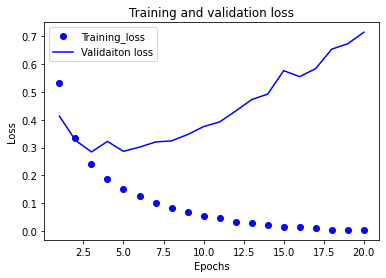

In [24]:
import matplotlib.pyplot as plt 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training_loss')
plt.plot(epochs, val_loss_values, 'b', label='Validaiton loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

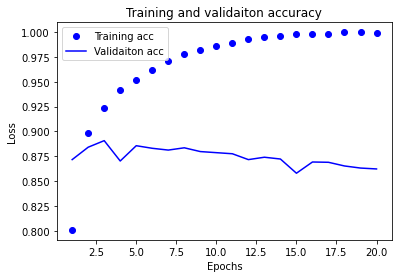

In [25]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validaiton acc')
plt.title('Training and validaiton accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Summary of Step 6**

In [26]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.7933 - accuracy: 0.8454


[0.7933270931243896, 0.8453599810600281]